In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
#this will allow the plot to be inline in the browser
%matplotlib inline

In [3]:
!python -V

Python 3.7.6


In [4]:
  print('networkx', nx.__version__)

networkx 2.6.2


### Exercise: Create the 4 node network of Lecture 1 and respond the following questions (use networkx documentation or Google the questions)

In [4]:
g = nx.Graph()  #Graph base class for undirected graphs. See also:DiGraph for directed graphs
g.add_edge('1','2',weight=1.0) #Nodes can be arbitrary (hashable) Python objects with optional key/value attributes.
g.add_edge('2','3',weight=1.0) #Edges are represented as links between nodes with optional key/value attributes.                                
g.add_edge('2','4',weight=1.0) #We create a network by adding 11 edges to the graph (g) of 4 nodes. 
g.add_edge('4','3',weight=1.0)

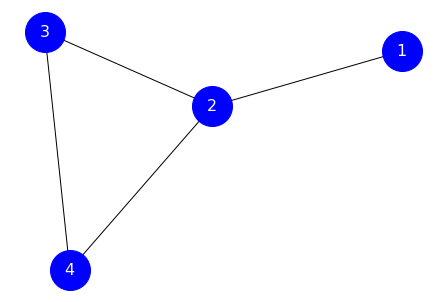

In [5]:
nx.draw(g,
        with_labels=True,
        node_color='blue',
        node_size=1600,
        font_color='white',
        font_size=16,
        )

In [6]:
## Separate in groups of 5 people see here: 

#### 1) Print Nodes

In [7]:
print("Nodes: ",list(g.nodes))

Nodes:  ['1', '2', '3', '4']


#### 2) Print Edges

In [8]:
print("Nodes: ",list(g.edges))

Nodes:  [('1', '2'), ('2', '3'), ('2', '4'), ('3', '4')]


#### 3) Print number of nodes

In [9]:
print("Number of Nodes: ",g.number_of_nodes())

Number of Nodes:  4


#### 4) Print number of Edges

In [10]:
print("Number of Nodes: ",g.number_of_edges())

Number of Nodes:  4


#### 5) Iterate through nodes and print neighbors

In [11]:
for node in g.nodes():
    print ("Neighbors of ", node, " are : ", list(g.neighbors(node)))

Neighbors of  1  are :  ['2']
Neighbors of  2  are :  ['1', '3', '4']
Neighbors of  3  are :  ['2', '4']
Neighbors of  4  are :  ['2', '3']


#### 6) Iterate through nodes and print degree

In [12]:
for node in g.nodes():
    print ("Degree of ", node, " are : ", g.degree(node))

Degree of  1  are :  1
Degree of  2  are :  3
Degree of  3  are :  2
Degree of  4  are :  2


#### 7) Print weight of edges

In [13]:
for u,v in g.edges():
    print ("Weight of edge [", u, "][", v,"] is ", g[u][v]['weight'])

Weight of edge [ 1 ][ 2 ] is  1.0
Weight of edge [ 2 ][ 3 ] is  1.0
Weight of edge [ 2 ][ 4 ] is  1.0
Weight of edge [ 3 ][ 4 ] is  1.0


#### Repeat the exercise 1)-7) using DiGraph instead of Graph. 
#### Namely:  -Print Nodes, -Print Edges, -Number of Nodes, -Number of Edges, -Degree per node, -Neighbors of each Node, -Weight of edges

In [14]:
gd = nx.DiGraph()  #Graph base class for undirected graphs. See also:DiGraph for directed graphs
gd.add_edge('1','2',weight=1.0) #Nodes can be arbitrary (hashable) Python objects with optional key/value attributes.
gd.add_edge('2','3',weight=2.0) #Edges are represented as links between nodes with optional key/value attributes.                                
gd.add_edge('2','4',weight=3.0) #We create a network by adding 11 edges to the graph (g) of 4 nodes. 
gd.add_edge('4','3',weight=4.0)

In [15]:
edgewidth=[]
for u,v in gd.edges():
    edgewidth.append(gd.get_edge_data(u,v)['weight'])

In [16]:
edgewidth

[1.0, 2.0, 3.0, 4.0]

In [17]:
gd.edges()

OutEdgeView([('1', '2'), ('2', '3'), ('2', '4'), ('4', '3')])

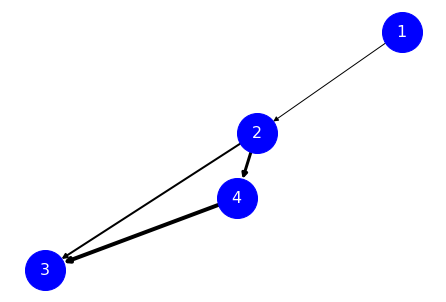

In [18]:
nx.draw(gd,
        with_labels=True,
        node_color='blue',
        node_size=1600,
        font_color='white',
        font_size=16,
        width = edgewidth
        )

#### Question 1, Print Nodes

In [20]:
print("Nodes: ",list(gd.nodes))

Nodes:  ['1', '2', '3', '4']


#### Question 2, Print Edges

In [22]:
print("Edges: ",list(gd.edges))

Edges:  [('1', '2'), ('2', '3'), ('2', '4'), ('4', '3')]


#### Question 3, Number of Nodes

#### Question 4, Number of Edges

#### Question 5, Neighbors of each Node

#### Question 6, Out Degree per node

#### Question 7, Print weigth of edges

#### Average Degree

In [18]:
print ("Average out-degree of  directed graph = ",np.mean(list(dict(gd.out_degree()).values())),", or: ",gd.number_of_edges()/gd.number_of_nodes())

Average out-degree of  directed graph =  1.0 , or:  1.0


In [19]:
print ("Average in-degree of  directed graph = ",np.mean(list(dict(gd.in_degree()).values())),", or: ",gd.number_of_edges()/gd.number_of_nodes())

Average in-degree of  directed graph =  1.0 , or:  1.0


In [20]:
print ("Average degree of  directed graph = ",np.mean(list(dict(gd.degree()).values())),", or: ",np.mean(list(dict(gd.in_degree()).values()))+np.mean(list(dict(gd.out_degree()).values())))

Average degree of  directed graph =  2.0 , or:  2.0


### Note that degree = in_degree + out_degree

In [21]:
np.mean(list(dict(gd.in_degree()).values()))+np.mean(list(dict(gd.out_degree()).values()))

2.0

#### Example extracting the degree of node 3 in Graph g

In [22]:
g.degree('3')

2

#### Question 7: extract the in-degree, out-degree and degree of node 4 in Graph dg

Hint:Check this link for in-degree and out-degree of a directed graph

https://networkx.github.io/documentation/networkx-1.10/reference/classes.digraph.html

In [23]:
np.mean(list(dict(gd.out_degree()).values()))

1.0

### Successors, Predecessors and Neighbors in Directed Graphs

Nodes in directed graphs have predecessors ("in-neighbors") and successors ("out-neighbors"):

Since NetworkX 2, the .degree() method on a directed graph gives the total degree: in-degree plus out-degree. However, in a bit of confusing nomenclature, the neighbors method is a synonym for successors, giving only the edges originating from the given node. This makes sense if you consider neighbors to be all the nodes reachable from the given node by following links, but it's easy to make the mistake of writing .neighbors() in your code when you really want both predecessors and successors.

#### Question 8: Write the neighbors, predecessors and successors of node 2 of dg

#### Let's Create the plot of the degree histogram of both graphs

Use the code of this example https://networkx.github.io/documentation/stable/auto_examples/drawing/plot_degree_histogram.html
Note that you do not need to use their G = nx.gnp_random_graph(100, 0.02), but the g and dg defined above

In [27]:
degree_list=list(dict(g.degree()).values())

In [33]:
degree_list

[1, 3, 2, 2]

In [52]:
Bins = range(1,max(degree_list)+2)

In [53]:
for n in Bins:
    print(n)

1
2
3
4


In [54]:
counts,k = np.histogram(degree_list, bins=Bins)

In [72]:
counts  #counts the occurrence of degree_list in Bins

array([1, 2, 1])

In [73]:
k[:-1]

array([1, 2, 3])

[Text(1.4, 0, '1'), Text(2.4, 0, '2'), Text(3.4, 0, '3')]

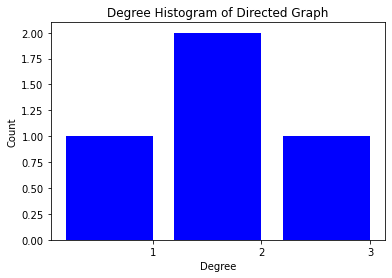

In [74]:
fig, ax = plt.subplots()
plt.bar(k[:-1],counts,width=0.80, color='b')
plt.title("Degree Histogram of Directed Graph")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in k[:-1]])
ax.set_xticklabels(k[:-1])